In [1]:
#!pip install yfinance
import yfinance as yf

df= yf.download("TCS.NS", start="2021-07-01", end="2022-01-28")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
import pandas as pd
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
df.columns.name = None 
dataset=df.drop(columns=['Volume'])
dataset

,Close,High,Low,Open
Date,,,,
2021-07-01,3180.317871,3199.829024,3171.609328,3196.021970
2021-07-02,3165.042236,3178.604868,3136.251387,3170.324571
2021-07-05,3160.806641,3211.250107,3142.723134,3180.793674
2021-07-06,3104.938232,3167.469050,3099.037345,3153.192597
2021-07-07,3116.978027,3124.354195,3085.236852,3117.025662
...,...,...,...,...
2022-01-20,3663.348145,3752.812466,3648.461303,3743.238965
2022-01-21,3670.001953,3687.282171,3610.263395,3644.632173
2022-01-24,3610.502686,3685.463017,3580.585492,3676.224682


In [3]:
column='Close'

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(dataset[[column]])
print('Len:',data1.shape)

Len: (144, 1)


In [5]:
len(data1)

144

In [6]:
training_size=round(len(data1)* 0.80)
print(training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length:",x_train.shape)
print("x_test length:",x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("x_train length:",y_train.shape)
print("x_test length:",y_test.shape)

115
x_train length: (115, 1)
x_test length: (29, 1)
x_train length: (115, 1)
x_test length: (29, 1)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
from statsmodels.tsa.arima.model import ARIMA
for i in orders:
    model=ARIMA(x_train, order=i)
    model_fit=model.fit()
    #make prediction
    y_pred=model_fit.predict(len(x_train), len(data1)-1)
    from stockFunctions import rmsemape
    print("Order={}". format(i))
    rmsemape(y_test, y_pred)
    print('*****************')

Order=(1, 1, 1)
RMSE-Testset: 0.2799858309228387
maPe-Testset: 0.30488088450049783
*****************
Order=(1, 1, 2)
RMSE-Testset: 0.2782429546774082
maPe-Testset: 0.30215659177596305
*****************
Order=(2, 3, 1)
RMSE-Testset: 0.43779207800028186
maPe-Testset: 0.49398156290082745
*****************
Order=(2, 2, 2)
RMSE-Testset: 0.2588729816923573
maPe-Testset: 0.2783367277536263
*****************


In [9]:
len(y_pred)

29

In [10]:
order=(2,2,2)
model=ARIMA(x_train, order=order)
model_fit=model.fit()
#make prediction
y_pred=model_fit.predict(len(x_train), len(data1)-1)

mse=mean_squared_error(y_test, y_pred, squared=False)
from stockFunctions import rmsemape
print("Order={}".format(order))
rmsemape(y_test,y_pred)
print("************")

Order=(2, 2, 2)
RMSE-Testset: 0.2588729816923573
maPe-Testset: 0.2783367277536263
************


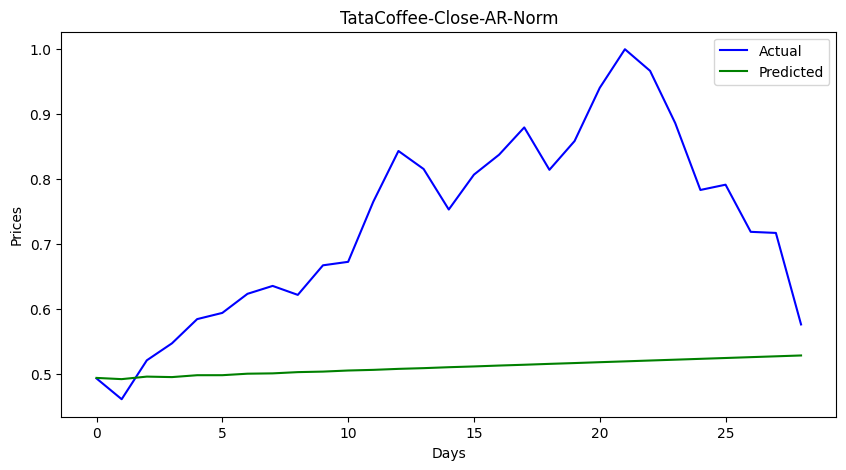

In [11]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [12]:
len(data1)

144

In [13]:
y_test

array([[0.4931013 ],
       [0.46110018],
       [0.52102251],
       [0.54719607],
       [0.5844437 ],
       [0.59400303],
       [0.62338239],
       [0.63556497],
       [0.62174971],
       [0.66727513],
       [0.67263808],
       [0.76520455],
       [0.84331364],
       [0.81556726],
       [0.7531959 ],
       [0.80688235],
       [0.83760074],
       [0.87962878],
       [0.81434319],
       [0.85864454],
       [0.94054287],
       [1.        ],
       [0.96671614],
       [0.88619138],
       [0.78330196],
       [0.79141891],
       [0.71883599],
       [0.71714255],
       [0.57623889]])

In [14]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [15]:
aTestNormTable

,Close
0,0.493101
1,0.4611
2,0.521023
3,0.547196
4,0.584444
5,0.594003
6,0.623382
7,0.635565
8,0.62175
9,0.667275


In [16]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[3425.45849609],
       [3399.22583008],
       [3448.34667969],
       [3469.80224609],
       [3500.33569336],
       [3508.171875  ],
       [3532.25537109],
       [3542.24194336],
       [3530.91699219],
       [3568.23608398],
       [3572.63232422],
       [3648.51293945],
       [3712.54223633],
       [3689.79736328],
       [3638.66894531],
       [3682.67797852],
       [3707.85913086],
       [3742.3112793 ],
       [3688.79394531],
       [3725.10961914],
       [3792.24511719],
       [3840.98461914],
       [3813.70043945],
       [3747.69091797],
       [3663.34814453],
       [3670.00195312],
       [3610.50268555],
       [3609.11450195],
       [3493.60986328]])

In [17]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,3425.458496
1,3399.22583
2,3448.34668
3,3469.802246
4,3500.335693
5,3508.171875
6,3532.255371
7,3542.241943
8,3530.916992
9,3568.236084


In [18]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [19]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

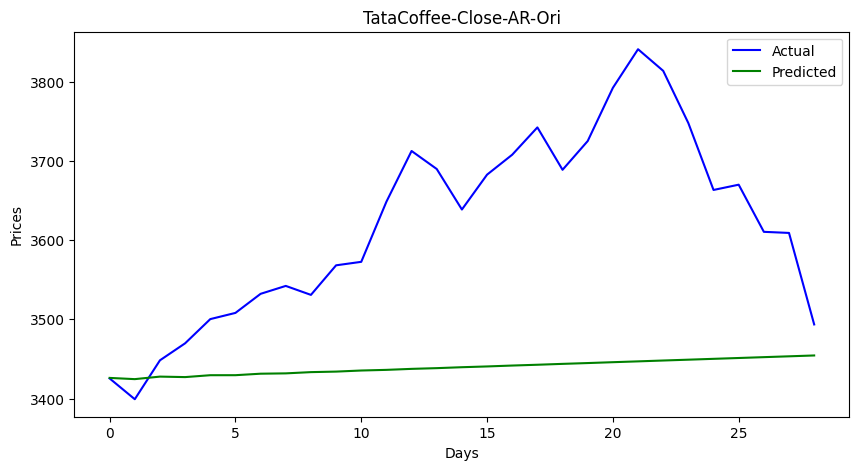

In [20]:
from stockFunctions import conversionSingle
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [21]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 212.20904109572885
maPe-Testset: 0.0493617100182494


In [22]:
forecast=model_fit.predict(len(data1),len(data1)+5)

In [23]:
forecast

array([0.52976059, 0.53105966, 0.53235321, 0.53365109, 0.53494557,
       0.53624272])

In [24]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,['Closefore'])
forecast_stock_price_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_oriF=conversionSingle(forecast_stock_price_ori,['Closefore'])
forecast_stock_price_oriF

,Closefore
0,3455.509655
1,3456.574552
2,3457.634929
3,3458.698859
4,3459.759996
5,3460.823329


In [25]:
#forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)